In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
car=pd.read_csv("C:\\Users\\Kartik\\Desktop\\Jupyter Notebook\\Linear Regression Project\\quikr_car.csv")
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",NaN,Petrol


In [4]:
#year has many non year value

In [5]:
car=car[car['year'].str.isnumeric()]


In [6]:
# convert year into numeric 

In [7]:
car['year']=car['year'].astype(int)

C:\Users\Kartik\AppData\Local\Temp\ipykernel_17432\152728128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['year']=car['year'].astype(int)


In [8]:
car['year']

0      2007
1      2006
2      2018
3      2014
4      2014
       ... 
886    2009
888    2018
889    2013
890    2014
891    2014
Name: year, Length: 842, dtype: int32

In [9]:
# cleaning data by removing "ask for price row from data"

In [10]:
car=car[car['Price']!='Ask For Price']

In [11]:
car['Price'].unique()

array(['80,000', '4,25,000', '3,25,000', '5,75,000', '1,75,000',
       '1,90,000', '8,30,000', '2,50,000', '1,82,000', '3,15,000',
       '4,15,000', '3,20,000', '10,00,000', '5,00,000', '3,50,000',
       '1,60,000', '3,10,000', '75,000', '1,00,000', '2,90,000', '95,000',
       '1,80,000', '3,85,000', '1,05,000', '6,50,000', '6,89,999',
       '4,48,000', '5,49,000', '5,01,000', '4,89,999', '2,80,000',
       '3,49,999', '2,84,999', '3,45,000', '4,99,999', '2,35,000',
       '2,49,999', '14,75,000', '3,95,000', '2,20,000', '1,70,000',
       '85,000', '2,00,000', '5,70,000', '1,10,000', '4,48,999',
       '18,91,111', '1,59,500', '3,44,999', '4,49,999', '8,65,000',
       '6,99,000', '3,75,000', '2,24,999', '12,00,000', '1,95,000',
       '3,51,000', '2,40,000', '90,000', '1,55,000', '6,00,000',
       '1,89,500', '2,10,000', '3,90,000', '1,35,000', '16,00,000',
       '7,01,000', '2,65,000', '5,25,000', '3,72,000', '6,35,000',
       '5,50,000', '4,85,000', '3,29,500', '2,51,111', 

In [12]:
# removing , from price and convert data type obj to integer

In [13]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [14]:
car['Price'].unique()

array([  80000,  425000,  325000,  575000,  175000,  190000,  830000,
        250000,  182000,  315000,  415000,  320000, 1000000,  500000,
        350000,  160000,  310000,   75000,  100000,  290000,   95000,
        180000,  385000,  105000,  650000,  689999,  448000,  549000,
        501000,  489999,  280000,  349999,  284999,  345000,  499999,
        235000,  249999, 1475000,  395000,  220000,  170000,   85000,
        200000,  570000,  110000,  448999, 1891111,  159500,  344999,
        449999,  865000,  699000,  375000,  224999, 1200000,  195000,
        351000,  240000,   90000,  155000,  600000,  189500,  210000,
        390000,  135000, 1600000,  701000,  265000,  525000,  372000,
        635000,  550000,  485000,  329500,  251111,  569999,   69999,
        299999,  399999,  450000,  270000,  158400,  179000,  125000,
        299000,  150000,  275000,  285000,  340000,   70000,  289999,
        849999,  749999,  274999,  984999,  599999,  244999,  474999,
        245000,  169

In [15]:
# remove kms from "kms_driven" column

In [16]:
car['kms_driven'] = car['kms_driven'].str.replace('kms', '').str.replace(',', '')

In [17]:
car["kms_driven"].unique()

array(['45000 ', '40 ', '28000 ', '36000 ', '41000 ', '25000 ', '24530 ',
       '60000 ', '30000 ', '32000 ', '48660 ', '4000 ', '16934 ',
       '43000 ', '35550 ', '39522 ', '39000 ', '55000 ', '72000 ',
       '15975 ', '70000 ', '23452 ', '35522 ', '48508 ', '15487 ',
       '82000 ', '20000 ', '68000 ', '38000 ', '27000 ', '33000 ',
       '46000 ', '16000 ', '47000 ', '35000 ', '30874 ', '15000 ',
       '29685 ', '130000 ', '19000 ', '54000 ', '13000 ', '38200 ',
       '22000 ', '50000 ', '13500 ', '3600 ', '45863 ', '60500 ',
       '12500 ', '18000 ', '13349 ', '29000 ', '44000 ', '42000 ',
       '14000 ', '49000 ', '36200 ', '51000 ', '104000 ', '33333 ',
       '33600 ', '5600 ', '7500 ', '26000 ', '24330 ', '65480 ',
       '200000 ', '59000 ', '99000 ', '2800 ', '21000 ', '11000 ',
       '66000 ', '3000 ', '7000 ', '38500 ', '37200 ', '43200 ', '24800 ',
       '45872 ', '40000 ', '11400 ', '97200 ', '52000 ', '31000 ',
       '175430 ', '37000 ', '65000 ', '3350 ', '7

In [18]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel
889,Mahindra Quanto C8,Mahindra,2013,390000,40000,Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,180000,NaN,Petrol


In [19]:
# fill kms_driven missing value by mean of kms_driven column

In [20]:
car.dropna(inplace=True)

In [21]:
car['kms_driven']=car['kms_driven'].astype(int)

In [22]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [23]:
#only fetching the first 3 name of the car

In [24]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [25]:
car.index # there is missing index in it.

Index([  0,   1,   3,   4,   6,   7,   8,   9,  10,  11,
       ...
       877, 878, 879, 880, 881, 883, 885, 886, 888, 889],
      dtype='int64', length=816)

In [26]:
car=car.reset_index(drop=True)

 # CLEANSED DATA

In [27]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [28]:
# checking outliers in data

In [29]:
import seaborn as sns

<Axes: ylabel='Price'>

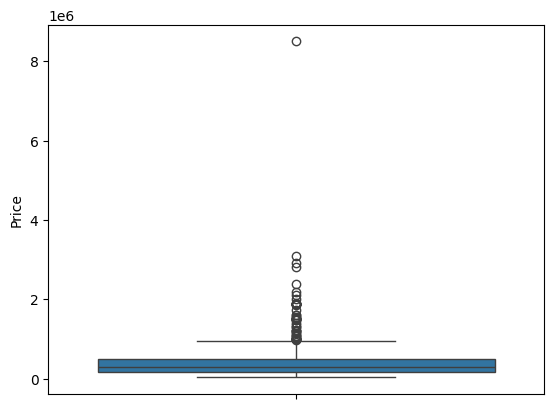

In [30]:
sns.boxplot(car["Price"])
#  that's show that price has outlier in data that's affect model performance

<Axes: ylabel='kms_driven'>

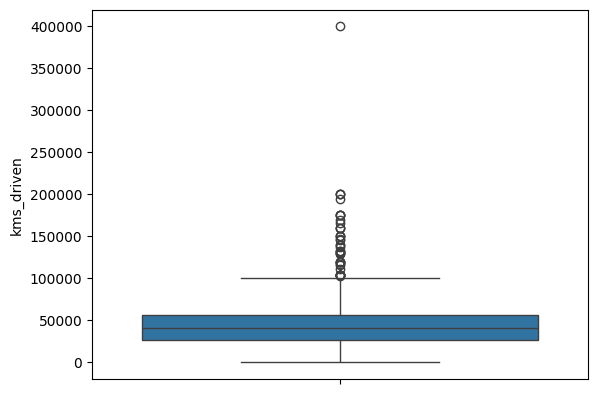

In [31]:
sns.boxplot(car["kms_driven"])

In [32]:
car["Price"].describe()

count    8.160000e+02
mean     4.117176e+05
std      4.751844e+05
min      3.000000e+04
25%      1.750000e+05
50%      2.999990e+05
75%      4.912500e+05
max      8.500003e+06
Name: Price, dtype: float64

In [33]:
# finding outlier in dataset

<Axes: ylabel='Price'>

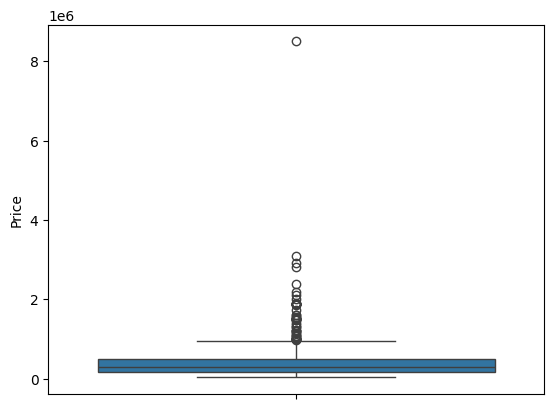

In [34]:
#sns.displot(car["Price"])
sns.boxplot(car["Price"])



<Axes: ylabel='kms_driven'>

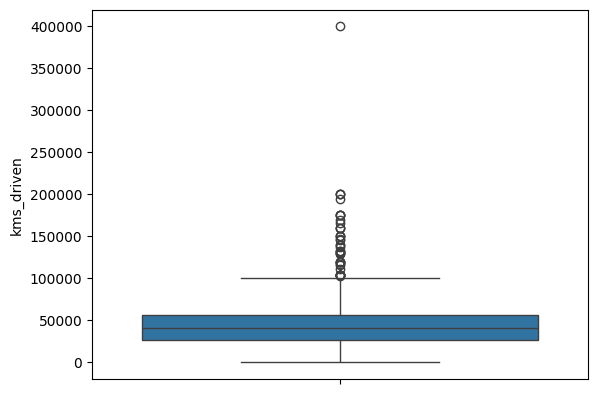

In [35]:
sns.boxplot(car["kms_driven"])

In [36]:
# removing outliers

In [37]:
car=car[car["Price"]<6e6].reset_index(drop=True)

<Axes: ylabel='Price'>

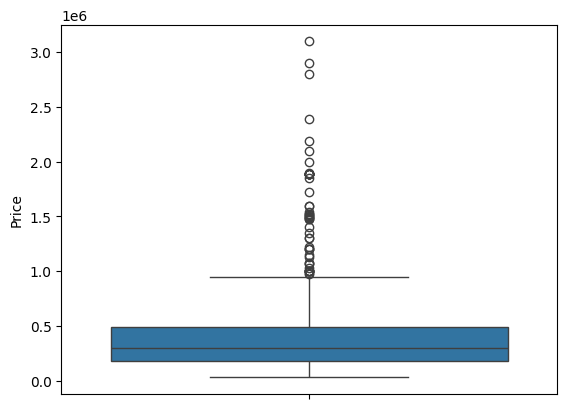

In [38]:
sns.boxplot(car["Price"])

In [39]:
car=car[car["kms_driven"]<230000].reset_index(drop=True)

In [40]:
car.describe()

,year,Price,kms_driven
count,814.000000,8.140000e+02,814.000000
mean,2012.445946,4.019921e+05,45842.547912
std,4.006625,3.817812e+05,32017.452360
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56681.000000
max,2019.000000,3.100000e+06,200000.000000


In [41]:
# copying dataset

In [42]:
df=car.copy()

# TRAIN TEST SPLIT

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x=df.drop(columns=['Price'])
y=df['Price']

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


In [47]:
ohe=OneHotEncoder()
ohe.fit(x[["name","company","fuel_type"]])

OneHotEncoder()

In [48]:
# creating a column transformer which transform caterogical columns

In [49]:
column_trans=make_column_transformer((OneHotEncoder(),["name","company","fuel_type"]),remainder="passthrough")

In [50]:
lr=LinearRegression()

In [51]:
pipe=make_pipeline(column_trans,lr)

In [52]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [57]:
y_test

247      95000
589      95000
227     245000
291     230000
539     215000
        ...   
676    3100000
440      90000
758     425000
518     110000
664      85000
Name: Price, Length: 163, dtype: int32

In [58]:
y_pred=lr.predict(x_test)
print(r2_score(y_pred,y_test))

C:\Users\Kartik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'Maruti Suzuki Esteem'

In [59]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        814 non-null    object
 1   company     814 non-null    object
 2   year        814 non-null    int32 
 3   Price       814 non-null    int32 
 4   kms_driven  814 non-null    int32 
 5   fuel_type   814 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.7+ KB


In [61]:
car['name']=car['name'].astype(float)

ValueError: could not convert string to float: 'Hyundai Santro Xing'